# **Don't Get Kicked!**

![](https://i.imgur.com/Y0X8dsA.jpg)

### **Predicting if the car puchased at an auction is good or bad buy.**



# Introduction


One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

In this project  figure out which cars have a higher risk of being a kick, which can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

We will take a look at real world data for 150,000 borrowers, and use machine learning techniques to build models which could be deployed in a bank to help the bank and a potential borrower make the best financial decision possible.

# Data Description

**All the variables in the data set are defined as follows:**

- RefID: Unique (sequential) number assigned to vehicles
- IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase
- PurchDate: The Date the vehicle was Purchased at Auction
- Auction: Auction provider at which the vehicle was purchased
- VehYear: The manufacturer's year of the vehicle
- VehicleAge: The Years elapsed since the manufacturer's year
- Make: Vehicle Manufacturer
- Model: Vehicle Model
- Trim: Vehicle Trim Level
- SubModel: Vehicle Submodel
- Color: Vehicle Color
- Transmission: Vehicles transmission type (Automatic, Manual)
- WheelTypeID: The type id of the vehicle wheel
- WheelType: The vehicle wheel type description (Alloy, Covers)
- VehOdo: The vehicles odometer reading
- Nationality: The Manufacturer's country
- Size: The size category of the vehicle (Compact, SUV, etc.)
- TopThreeAmericanName: Identifies if the manufacturer is one of the top three - American manufacturers
- MMRAcquisitionAuctionAveragePrice: Acquisition price for this vehicle in - average condition at time of purchase
- MMRAcquisitionAuctionCleanPrice: Acquisition price for this vehicle in the above Average condition at time of purchase
- MMRAcquisitionRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition at time of purchase
- MMRAcquisitonRetailCleanPrice: Acquisition price for this vehicle in the retail market in above average condition at time of purchase
- MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day
- MMRCurrentAuctionCleanPrice: Acquisition price for this vehicle in the above condition as of current day
- MMRCurrentRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition as of current day
- MMRCurrentRetailCleanPrice: Acquisition price for this vehicle in the retail market in above average condition as of current day
- PRIMEUNIT: Identifies if the vehicle would have a higher demand than a standard purchase
- AcquisitionType: Identifies how the vehicle was aquired (Auction buy, trade in, etc)
- AUCGUART: The level guarantee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
- KickDate: Date the vehicle was kicked back to the auction
- BYRNO: Unique number assigned to the buyer that purchased the vehicle
- VNZIP: Zipcode where the car was purchased
- VNST: State where the the car was purchased
- VehBCost: Acquisition cost paid for the vehicle at time of purchase
- IsOnlineSale: Identifies if the vehicle was originally purchased online
- WarrantyCost: Warranty price (term=36month and millage=36K)

There are 32 independent variables and the dependent variable which we need to predict is `IsBadBuy` 

# Project Outline

These are the steps that we will follow:
- Installing and importing all the libraries
- Downloading the data
- Exploratory Data Analysis
- Data Preprocessing
- Identifying Numeric and Categorical columns
- Imputing Missing Values
- Balancing the data(Over-Sampling)
- Training, Validation and Test sets
- Identifying Input and Target columns
- Scaling Numerical Data
- Encoding Categrical Columns
- Training dumb models
- Traning a Logistic Regression model
- Traning other different models
- Tuning HyperParameters
- Training the best model and making predictions
- Evaluate the models
- Summary

# Installing and importing all the libraries

In [2]:
!pip install jovian pandas numpy matplotlib==3.1.3 seaborn scikit-learn xgboost lightgbm opendatasets xgboost --upgrade --quiet

     |████████████████████████████████| 13.1 MB 2.0 MB/s 
     |████████████████████████████████| 285 kB 37.2 MB/s 
     |████████████████████████████████| 255.9 MB 41 kB/s 
     |████████████████████████████████| 2.0 MB 46.3 MB/s 


In [3]:
import jovian
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.rcParams['figure.figsize'] = (20,8)
sns.set_theme(style='whitegrid')

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-project-predict-if-car-purchased-at-auction-is-lemon")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/altamashwaseem04/ml-project-predict-if-car-purchased-at-auction-is-lemon


'https://jovian.ai/altamashwaseem04/ml-project-predict-if-car-purchased-at-auction-is-lemon'

# Downloading the data



We'll use the [`opendatasets`](https://github.com/JovianML/opendatasets) library to download the data from Kaggle directly within Jupyter. The dataset can be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [23]:
url = 'https://www.kaggle.com/competitions/DontGetKicked/data'

In [24]:
od.download(url)

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)


Now the data has been downloaded in the DontGetcked directory. Lets's check the directory using the `OS` library.

In [25]:
os.listdir('./DontGetKicked')

['test.zip',
 'test.csv',
 'training.csv',
 'example_entry.csv',
 'training.zip',
 'Carvana_Data_Dictionary.txt']

Now we know that the dataset has been downloaded, Let's load the dataset in the pandas dataframe using the `read_csv()` 

In [26]:
train_raw_df = pd.read_csv('./DontGetKicked/training.csv')
test_df = pd.read_csv('./DontGetKicked/test.csv')

# Exploratory Data Analysis

We have the dataset downlaoded and the loaded in the dataframe. Let's check the data that we have. We have two files train.csv and test.csv which contains the traning data and the test data.

Let's look at the training data first.

In [9]:
train_raw_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [10]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

As we can see that there are some missinng values for several columns. We'll take care of those missing values later, before that let's take a look at the mean, minimum, maximun and other values of the numerial columns.

In [11]:
train_raw_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


We an see that:
- The average age of the vehciles are around 4 years and the average odometer reading is around 71k.
- The 25 percentile of the odometer reading is around 61k which is quite close to the average odometer reading.
- the average vehicle buying cost is around 7 thousand and the 75th percentile is around 8 thousand whereas the maximum is 45 thousand so there is a little skewing here also

Let's take a look at the `Carvana_Data_Dictionary.txt` file which gives us info about all the columns in the dataset.

In [12]:
print("Description about the columns of Dataset:-\n")
with open('./DontGetKicked/Carvana_Data_Dictionary.txt') as f:
    print (f.read())

Description about the columns of Dataset:-

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers

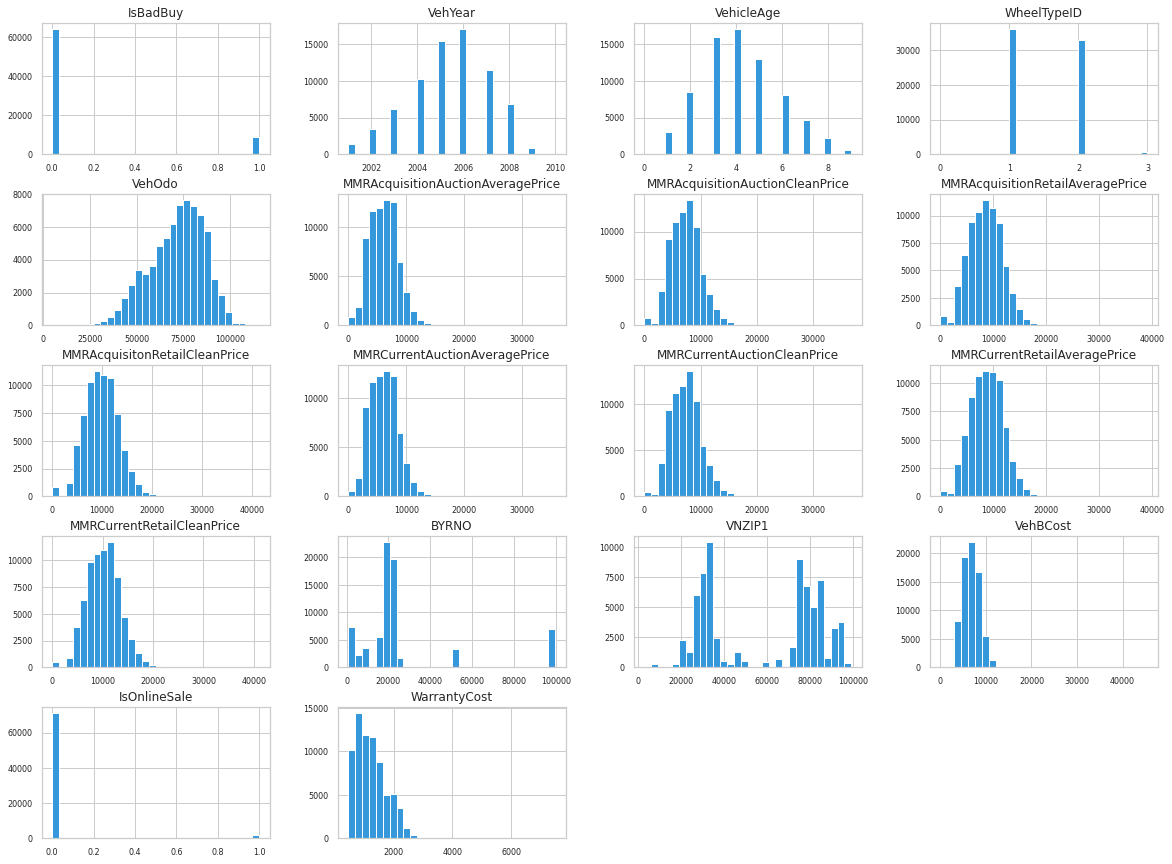

In [13]:
numerical_features = train_raw_df.select_dtypes(include = ['float64', 'int64']).columns.drop('RefId')
train_raw_df[numerical_features].hist(figsize=(20, 15), color = "#3498db", bins=30, xlabelsize=8, ylabelsize=8);

Observations:
- As we can see in the `IsBadBuy` graph that there are a lot of 0's which represent that the vehicle is not a bad buy and there are very lest data for vehicles that are actually a bad buy which will make this dataset unbalanced.
- The `VehYear` shows the manufacturing year of the vehicle and the vehicle age comes form vehicle year only.
- The `VehOdo` represets the Odometer reading of vehicle which  indicates the number of miles a vehicle has traveled and we can see here that it is a little skewd at the end.
- All the MMRA graphs show the price of vehicle at the time of auction. It shows the 'Aquisition' and 'Current' Price of the vehicle. We can clearly see that these are strongly correlated so we might need romove them.


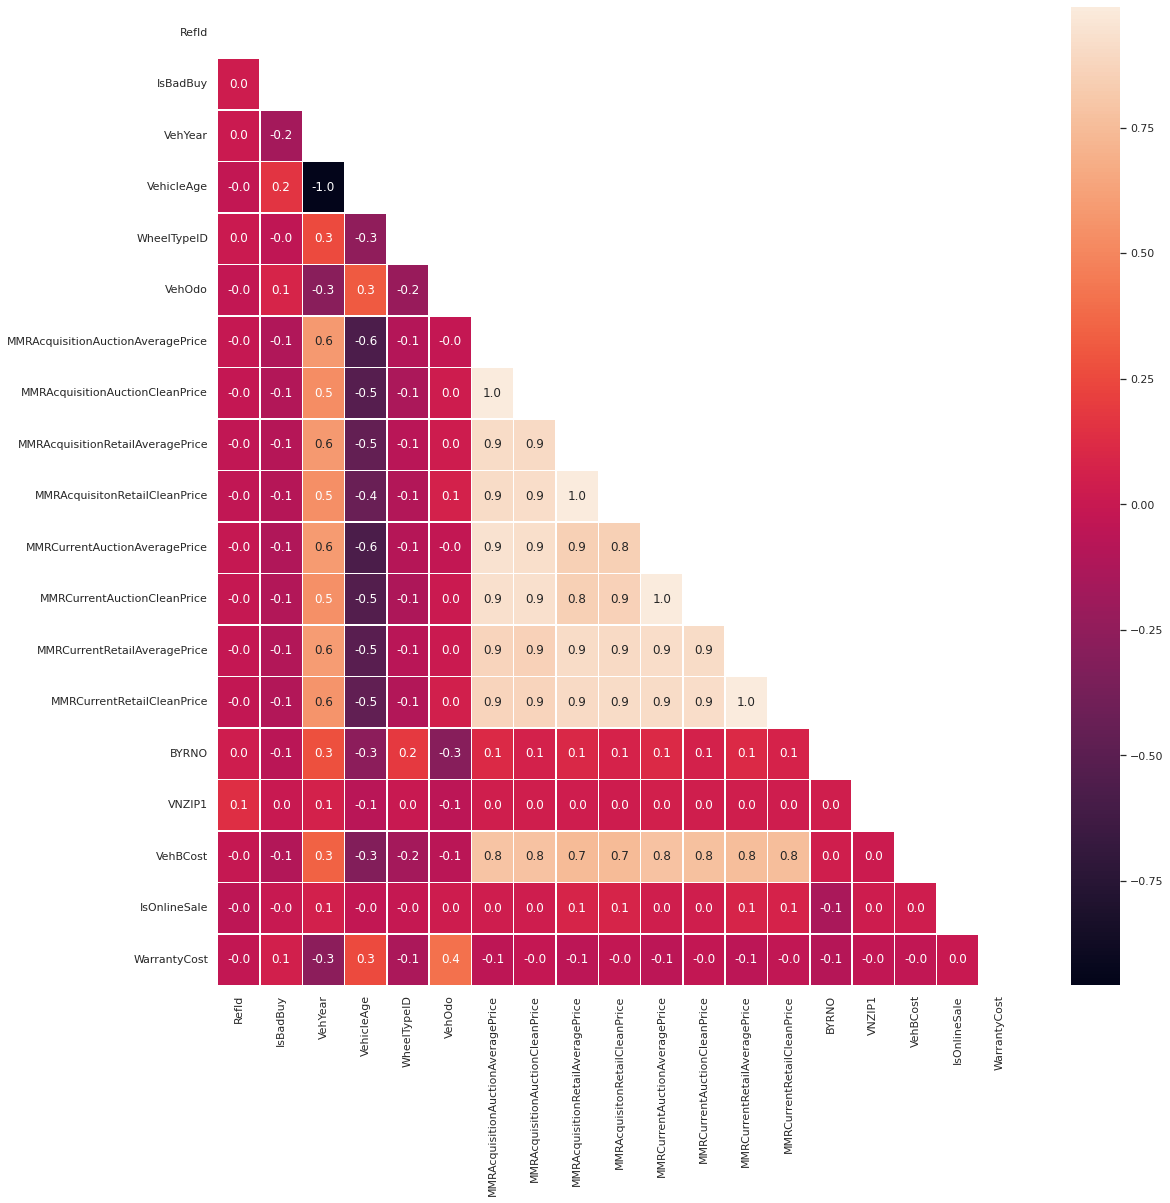

In [14]:
plt.figure(figsize=(18, 18))
matrix = np.triu(train_raw_df.corr())
sns.heatmap(train_raw_df.corr(), annot=True, linewidths=.5, fmt= '.1f', mask=matrix)
plt.show()

Observation:
- Here we can clearly see that the MMRA price columns are very strongly correlated with each other which might affect the accuracy of what we are trying to achieve.

# Data Preprocessing

In [66]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              72983 non-null  int64         
 1   IsBadBuy                           72983 non-null  category      
 2   PurchDate                          72983 non-null  datetime64[ns]
 3   Auction                            72983 non-null  object        
 4   VehicleAge                         72983 non-null  float64       
 5   Transmission                       72983 non-null  object        
 6   WheelType                          72983 non-null  object        
 7   VehOdo                             72983 non-null  float64       
 8   Nationality                        72983 non-null  object        
 9   Size                               72983 non-null  object        
 10  TopThreeAmericanName              

We can see that 'PurchDate' column which is d=a date column is not in date format, so let's change that first

In [61]:
print(type(train_raw_df.PurchDate[0]))

<class 'str'>


In [63]:
train_raw_df['PurchDate'] = pd.to_datetime(train_raw_df['PurchDate'])

In [64]:
print(type(train_raw_df.PurchDate[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


The target column here is `IsBadBuy` which is a category not a numeric value therefore we will change the datatype of this column into a `category`.

In [27]:
train_raw_df["IsBadBuy"] = train_raw_df["IsBadBuy"].astype("category")

We will delete WheelTypeID, because we already have a similar categorical column. Make - Cause there are too many categories.

In [30]:
train_raw_df.drop("WheelTypeID", inplace=True, axis=1)
test_df.drop("WheelTypeID", inplace=True, axis=1)

#train_raw_df.drop("PurchDate", inplace=True, axis=1)
#test_df.drop("PurchDate", inplace=True, axis=1)

We can delete columns with too many categories. The Controversial column here is - Color. On one hand, non-typical colors may mean that the car was replaced with parts and repainted, on the other hand, we have too many categories, but we will still delete them.

In [31]:
to_much_cat_delete_candidate = { "Model", "Trim", "SubModel", "VNZIP1", "VNST", "Make", "Color"}

for d in to_much_cat_delete_candidate:
    train_raw_df.drop(d, inplace=True, axis=1)
    test_df.drop(d, inplace=True, axis=1)

KeyError: ignored

We remove too strongly correlated columns, leaving two columns with price information, because we believe that they have a significant impact on the target.

In [33]:
corr_delete_candidate = { "MMRCurrentAuctionAveragePrice",
                         "MMRCurrentAuctionCleanPrice",
                         "MMRCurrentRetailAveragePrice",
                         "MMRCurrentRetailCleanPrice",
                         "MMRAcquisitionAuctionCleanPrice",
                         "MMRAcquisitonRetailCleanPrice",
                         "VehYear"
                        }

for d in corr_delete_candidate:
    train_raw_df.drop(d, inplace=True, axis=1)
    test_df.drop(d, inplace=True, axis=1)

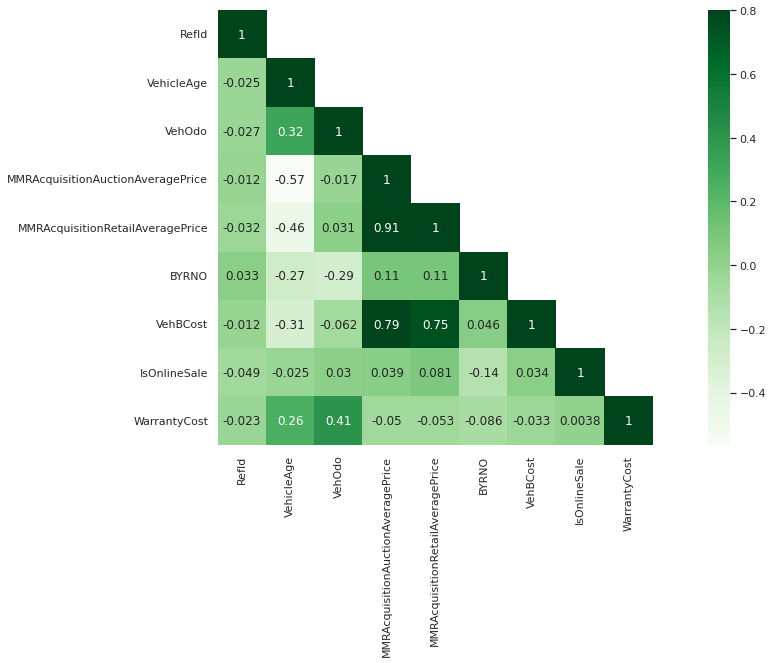

In [34]:
corrMatt = train_raw_df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True);

Let's check each columns that we have left in our data

In [35]:
train_raw_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,PRIMEUNIT,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,3,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,11636.0,NaN,NaN,21973,7100.0,0,1113
1,2,0,12/7/2009,ADESA,5,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,10897.0,NaN,NaN,19638,7600.0,0,1053
2,3,0,12/7/2009,ADESA,4,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,6943.0,NaN,NaN,19638,4900.0,0,1389
3,4,0,12/7/2009,ADESA,5,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,4658.0,NaN,NaN,19638,4100.0,0,630
4,5,0,12/7/2009,ADESA,4,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,7723.0,NaN,NaN,19638,4000.0,0,1020


In [36]:
train_raw_df.Transmission.value_counts()

AUTO      70398
MANUAL     2575
Manual        1
Name: Transmission, dtype: int64

As e can see that there is one 'Manual' value which is creating a new category whilst it is the same category as 'MANUAL'. Let's correct that:

In [37]:
train_raw_df.Transmission.replace("Manual", "MANUAL", inplace=True)

In [38]:
train_raw_df.Transmission.value_counts()

AUTO      70398
MANUAL     2576
Name: Transmission, dtype: int64

**WheelType**

In [39]:
train_raw_df.WheelType.unique()

array(['Alloy', 'Covers', nan, 'Special'], dtype=object)

No problem in the `WheelType` column except the 'nan' value which we will impute in the next section

**Nationality**

In [40]:
train_raw_df.Nationality.unique()

array(['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER', nan],
      dtype=object)

In the Nationality column there are two category which represents ASIAN only therefore we can combine these two into one ASIAN category.

In [ ]:
# train_raw_df.Nationality.replace(['OTHER ASIAN', 'TOP LINE ASIAN'], 'ASIAN', inplace=True)

In [ ]:
# train_raw_df.Nationality.unique()

array(['ASIAN', 'AMERICAN', 'OTHER', nan], dtype=object)

**Size**

In [41]:
train_raw_df.Size.unique()

array(['MEDIUM', 'LARGE TRUCK', 'COMPACT', 'LARGE', 'VAN', 'MEDIUM SUV',
       'LARGE SUV', 'SPECIALTY', 'SPORTS', 'CROSSOVER', 'SMALL SUV',
       'SMALL TRUCK', nan], dtype=object)

**TopThreeAmericanName**

In [42]:
train_raw_df.TopThreeAmericanName.unique()

array(['OTHER', 'CHRYSLER', 'FORD', 'GM', nan], dtype=object)

# Identifying Numeric and Categorical columns

It is always a good practice to indentify the numerical and catagorical columns so that it becomes easier to work on them. 

In [43]:
numerical_cols = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                  'MMRAcquisitionRetailAveragePrice', 'VehBCost', 'WarrantyCost']

categorical_cols = ['Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 
                   'AUCGUART', 'IsOnlineSale']

In [44]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   RefId                              72983 non-null  int64   
 1   IsBadBuy                           72983 non-null  category
 2   PurchDate                          72983 non-null  object  
 3   Auction                            72983 non-null  object  
 4   VehicleAge                         72983 non-null  int64   
 5   Transmission                       72974 non-null  object  
 6   WheelType                          69809 non-null  object  
 7   VehOdo                             72983 non-null  int64   
 8   Nationality                        72978 non-null  object  
 9   Size                               72978 non-null  object  
 10  TopThreeAmericanName               72978 non-null  object  
 11  MMRAcquisitionAuctionAveragePrice  72965 

We still have one more problem here. The `IsOnlineSale` column is integer format where it should be a catagorical column cause either the vehicle was bought online or it was not, there is nothing numerical about it so we will change it to object.

In [45]:
train_raw_df['IsOnlineSale'] = train_raw_df['IsOnlineSale'].astype('object')
test_df['IsOnlineSale'] = test_df['IsOnlineSale'].astype('object')

# Imputing Missing Values

We all know that machine learning models cannot work with missing data therefore we will need to fill these missing values and this process is called imputation.

In [46]:
train_raw_df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehicleAge                               0
Transmission                             9
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionRetailAveragePrice        18
PRIMEUNIT                            69564
AUCGUART                             69564
BYRNO                                    0
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
dtype: int64

As there are too many missing values in the `WheelType`, `PRIMEUNIT` and `AUCGUART` columns and these are catagorical columns so, we are going to create new catgories for them.

In [47]:
nan_new_cat_candidate = {"PRIMEUNIT", "AUCGUART", "WheelType" }

for c in nan_new_cat_candidate:
    train_raw_df[c] = train_raw_df[c].fillna(value="Unkown", inplace=False)
    test_df[c] = test_df[c].fillna(value="Unkown", inplace=False)

Now for the missing in the rest of the catgorical columns we will replace them with the value with the highest frequency that is, the value that has appeared the most.

We will use the `mode()` to fill the missing values here.

In [48]:
missing_categorical_data = ['Transmission', 'Nationality', 'Size', 'TopThreeAmericanName']

for c in missing_categorical_data:
    train_raw_df[c].replace([np.nan], train_raw_df[c].mode(), inplace = True)
    test_df[c].replace([np.nan], test_df[c].mode(), inplace = True)

In [49]:
train_raw_df.isna().sum()

RefId                                 0
IsBadBuy                              0
PurchDate                             0
Auction                               0
VehicleAge                            0
Transmission                          0
WheelType                             0
VehOdo                                0
Nationality                           0
Size                                  0
TopThreeAmericanName                  0
MMRAcquisitionAuctionAveragePrice    18
MMRAcquisitionRetailAveragePrice     18
PRIMEUNIT                             0
AUCGUART                              0
BYRNO                                 0
VehBCost                              0
IsOnlineSale                          0
WarrantyCost                          0
dtype: int64

In [50]:
test_df.isna().sum()

RefId                                 0
PurchDate                             0
Auction                               0
VehicleAge                            0
Transmission                          0
WheelType                             0
VehOdo                                0
Nationality                           0
Size                                  0
TopThreeAmericanName                  0
MMRAcquisitionAuctionAveragePrice    10
MMRAcquisitionRetailAveragePrice     10
PRIMEUNIT                             0
AUCGUART                              0
BYRNO                                 0
VehBCost                              0
IsOnlineSale                          0
WarrantyCost                          0
dtype: int64

Now we can see that there missing values in the numerical columns and there are several techniques to impute them, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer=SimpleImputer(strategy='mean');
imputer.fit(train_raw_df[numerical_cols]);
train_raw_df[numerical_cols]=imputer.transform(train_raw_df[numerical_cols]);
test_df[numerical_cols]=imputer.transform(test_df[numerical_cols]);

In [53]:
train_raw_df.isna().sum()

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehicleAge                           0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionRetailAveragePrice     0
PRIMEUNIT                            0
AUCGUART                             0
BYRNO                                0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

# Balancing the data(Over-Sampling)

Now As we can see that our datset is very highly unbalanced with 87% of the data belonging to "IsBadBuy = 0".

In [ ]:
# train_raw_df["IsBadBuy"].value_counts(dropna=False)

0    64007
1     8976
Name: IsBadBuy, dtype: int64

So before we train our model we will balance our dataset and this is an important part so as to give equal priority to each class.

0    64007
1    64007
Name: IsBadBuy, dtype: int64


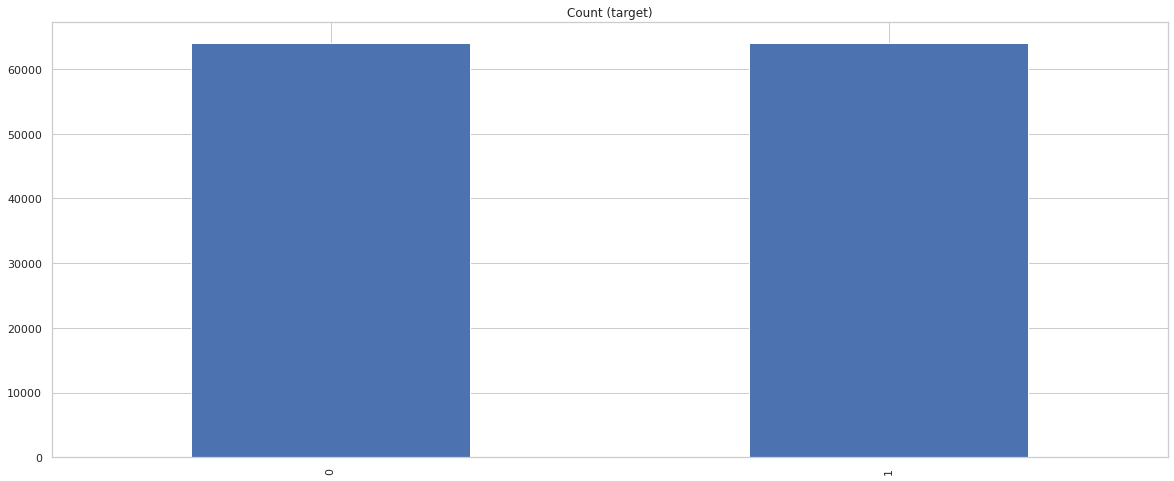

In [ ]:
# count_class_0, count_class_1 = train_raw_df.IsBadBuy.value_counts()

# df_class_0 = train_raw_df[train_raw_df['IsBadBuy'] == 0]
# df_class_1 = train_raw_df[train_raw_df['IsBadBuy'] == 1]

# df_class_1_over = df_class_1.sample(count_class_0, replace=True)
# df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# print(df_test_over.IsBadBuy.value_counts())

# df_test_over.IsBadBuy.value_counts().plot(kind='bar', title='Count (target)');

Now as we can see in the graph, there is equal number of rows for each class.

In [ ]:
# train_raw_df = df_test_over
# train_raw_df

,RefId,IsBadBuy,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,PRIMEUNIT,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,ADESA,3.0,AUTO,Alloy,89046.0,ASIAN,MEDIUM,OTHER,8155.0,11636.0,Unkown,Unkown,21973,7100.0,0,1113.0
1,2,0,ADESA,5.0,AUTO,Alloy,93593.0,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,10897.0,Unkown,Unkown,19638,7600.0,0,1053.0
2,3,0,ADESA,4.0,AUTO,Covers,73807.0,AMERICAN,MEDIUM,CHRYSLER,3202.0,6943.0,Unkown,Unkown,19638,4900.0,0,1389.0
3,4,0,ADESA,5.0,AUTO,Alloy,65617.0,AMERICAN,COMPACT,CHRYSLER,1893.0,4658.0,Unkown,Unkown,19638,4100.0,0,630.0
4,5,0,ADESA,4.0,MANUAL,Covers,69367.0,AMERICAN,COMPACT,FORD,3913.0,7723.0,Unkown,Unkown,19638,4000.0,0,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57309,57337,1,MANHEIM,4.0,AUTO,Alloy,65800.0,AMERICAN,MEDIUM,CHRYSLER,4926.0,8556.0,Unkown,Unkown,16926,5705.0,0,1215.0
66544,66576,1,ADESA,4.0,AUTO,Covers,83115.0,AMERICAN,MEDIUM,GM,5694.0,9775.0,Unkown,Unkown,17675,6755.0,0,1113.0
21241,21256,1,MANHEIM,5.0,AUTO,Covers,91024.0,AMERICAN,COMPACT,FORD,3708.0,7117.0,Unkown,Unkown,17212,5060.0,0,1341.0
58690,58719,1,MANHEIM,4.0,AUTO,Covers,74638.0,AMERICAN,MEDIUM SUV,GM,9324.0,10570.0,Unkown,Unkown,21053,9645.0,0,1974.0


# Training, Validation and Test sets

**Training, Validation and Test Sets:**

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# train_df, val_df = train_test_split(train_raw_df, test_size = 0.25, random_state = 42)

As we have date column in our dataset, therefore we will split our data as a time series dataset but before we split we need to sort the dataset with respect to the 'PurchDate' column.

In [68]:
train_raw_df.sort_values(by='PurchDate')

,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,PRIMEUNIT,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
32367,32389,0,2009-01-05,MANHEIM,2.0,AUTO,Covers,78541.0,AMERICAN,CROSSOVER,CHRYSLER,7261.0,8342.0,Unkown,Unkown,3453,6770.0,0,1389.0
32384,32406,0,2009-01-05,MANHEIM,4.0,AUTO,Alloy,37676.0,AMERICAN,VAN,FORD,4409.0,5262.0,Unkown,Unkown,22916,6160.0,0,941.0
32385,32407,0,2009-01-05,MANHEIM,5.0,AUTO,Covers,71680.0,AMERICAN,MEDIUM,CHRYSLER,3098.0,3846.0,Unkown,Unkown,3453,4250.0,0,1155.0
32386,32408,0,2009-01-05,MANHEIM,3.0,AUTO,Alloy,69456.0,AMERICAN,MEDIUM SUV,GM,8530.0,9712.0,Unkown,Unkown,22916,8180.0,0,1703.0
32387,32409,0,2009-01-05,MANHEIM,5.0,AUTO,Alloy,66530.0,AMERICAN,MEDIUM,FORD,3094.0,3842.0,Unkown,Unkown,22916,4900.0,0,825.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68063,68095,0,2010-12-30,ADESA,4.0,AUTO,Alloy,83249.0,OTHER ASIAN,COMPACT,OTHER,4618.0,7681.0,Unkown,Unkown,52598,4500.0,0,983.0
68064,68096,1,2010-12-30,ADESA,4.0,AUTO,Unkown,55109.0,OTHER ASIAN,MEDIUM SUV,OTHER,7057.0,10843.0,Unkown,Unkown,52598,7470.0,0,920.0
68065,68097,1,2010-12-30,ADESA,5.0,AUTO,Alloy,92567.0,AMERICAN,MEDIUM,FORD,3016.0,6307.0,NO,GREEN,52598,4130.0,0,1053.0
60693,60722,1,2010-12-30,MANHEIM,5.0,AUTO,Covers,80072.0,AMERICAN,MEDIUM,GM,3806.0,6708.0,Unkown,Unkown,21047,4395.0,0,1243.0


Now we can see that our dataframe is sorted, let's also reset tthe index here too.

In [69]:
train_raw_df.reset_index(inplace =True)
train_raw_df

In [71]:
train_df = train_raw_df[:55000]
val_df = train_raw_df[55001:]

In [72]:
train_df

,index,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,PRIMEUNIT,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
0,0,1,0,2009-12-07,ADESA,3.0,AUTO,Alloy,89046.0,OTHER ASIAN,MEDIUM,OTHER,8155.0,11636.0,Unkown,Unkown,21973,7100.0,0,1113.0
1,1,2,0,2009-12-07,ADESA,5.0,AUTO,Alloy,93593.0,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,10897.0,Unkown,Unkown,19638,7600.0,0,1053.0
2,2,3,0,2009-12-07,ADESA,4.0,AUTO,Covers,73807.0,AMERICAN,MEDIUM,CHRYSLER,3202.0,6943.0,Unkown,Unkown,19638,4900.0,0,1389.0
3,3,4,0,2009-12-07,ADESA,5.0,AUTO,Alloy,65617.0,AMERICAN,COMPACT,CHRYSLER,1893.0,4658.0,Unkown,Unkown,19638,4100.0,0,630.0
4,4,5,0,2009-12-07,ADESA,4.0,MANUAL,Covers,69367.0,AMERICAN,COMPACT,FORD,3913.0,7723.0,Unkown,Unkown,19638,4000.0,0,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,54995,55023,0,2009-07-07,MANHEIM,6.0,MANUAL,Special,79000.0,AMERICAN,SPORTS,FORD,4699.0,5575.0,Unkown,Unkown,8655,6105.0,0,1103.0
54996,54996,55024,0,2009-08-11,MANHEIM,1.0,AUTO,Alloy,62129.0,AMERICAN,SMALL SUV,FORD,12199.0,13675.0,Unkown,Unkown,8655,8775.0,0,825.0
54997,54997,55025,0,2009-08-11,MANHEIM,2.0,AUTO,Covers,60478.0,AMERICAN,SPECIALTY,CHRYSLER,9780.0,11062.0,Unkown,Unkown,8655,9890.0,0,1215.0
54998,54998,55026,0,2009-08-11,MANHEIM,5.0,AUTO,Alloy,79308.0,AMERICAN,MEDIUM SUV,GM,6850.0,7898.0,Unkown,Unkown,8655,6170.0,0,3667.0


In [73]:
val_df

,index,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,PRIMEUNIT,AUCGUART,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
55001,55001,55029,0,2009-08-11,MANHEIM,4.0,AUTO,Covers,73270.0,AMERICAN,MEDIUM,GM,4270.0,5112.0,Unkown,Unkown,8655,4100.0,0,1155.0
55002,55002,55030,0,2009-09-15,MANHEIM,6.0,AUTO,Covers,74457.0,AMERICAN,MEDIUM,GM,3388.0,4159.0,Unkown,Unkown,8655,4760.0,0,2274.0
55003,55003,55031,0,2009-09-15,MANHEIM,5.0,AUTO,Alloy,83648.0,AMERICAN,SMALL SUV,FORD,5628.0,6578.0,Unkown,Unkown,8655,5805.0,0,983.0
55004,55004,55032,0,2009-09-15,MANHEIM,4.0,AUTO,Alloy,84186.0,AMERICAN,LARGE,GM,4930.0,5824.0,Unkown,Unkown,8655,5170.0,0,2412.0
55005,55005,55033,0,2009-09-15,MANHEIM,3.0,AUTO,Covers,65766.0,AMERICAN,MEDIUM,GM,5876.0,6846.0,Unkown,Unkown,8655,5605.0,0,728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,72978,73010,1,2009-12-02,ADESA,8.0,AUTO,Alloy,45234.0,AMERICAN,MEDIUM,FORD,1996.0,2656.0,Unkown,Unkown,18111,4200.0,0,993.0
72979,72979,73011,0,2009-12-02,ADESA,2.0,AUTO,Unkown,71759.0,AMERICAN,MEDIUM,GM,6418.0,7431.0,Unkown,Unkown,18881,6200.0,0,1038.0
72980,72980,73012,0,2009-12-02,ADESA,4.0,AUTO,Alloy,88500.0,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9729.0,Unkown,Unkown,18111,8200.0,0,1893.0
72981,72981,73013,0,2009-12-02,ADESA,3.0,AUTO,Alloy,79554.0,AMERICAN,LARGE,GM,6420.0,7434.0,Unkown,Unkown,18881,7000.0,0,1974.0


# Identifying Input and Target columns

We should always decide which columns we will be using for traning the model cause not all the columns are necessary for training the model like `RefId` column which will be useless here and also the `IsBadBuy` column which the value which we want to predict.

In [74]:
input_cols = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
              'VehBCost', 'WarrantyCost', 'Transmission', 'WheelType', 'Nationality', 'Size',
              'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'IsOnlineSale']

target_cols = ['IsBadBuy']

In [75]:
train_inputs = train_df[input_cols]
train_target = train_df['IsBadBuy']

In [76]:
val_inputs = val_df[input_cols]
val_target = val_df['IsBadBuy']

In [77]:
test_inputs = test_df[input_cols]

# Scaling Numerical Data

Another good practice is to scale numeric features to a small range of values e.g. (0,1) or (−1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

We will use `MinMaxScaler` from `sklearn.preprocessing` to scale numeric features.

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
scaler.fit(train_inputs[numerical_cols])

MinMaxScaler()

In [81]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [82]:
train_inputs[numerical_cols].describe()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,WarrantyCost
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,0.463347,0.601769,0.172534,0.218951,0.148400,0.116786
std,0.191865,0.131116,0.068738,0.080416,0.038510,0.085341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.514194,0.121018,0.162839,0.120392,0.055571
50%,0.444444,0.618476,0.172527,0.217938,0.148104,0.104463
75%,0.555556,0.700468,0.217877,0.273593,0.173727,0.165009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Encoding Categrical Columns

**Encoding Categorical Data:**

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A very common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 


We will use `OneHotEncoder` from `sklearn.preprocessing` to achive this goal.

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [85]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

After fitting the categorical columns to the `OneHotEncoder` object, the encoder creates a list of new columns from all the categories in the columns and we can access them using `get_feature_names_out`.

In [86]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

Now we will use these encoded columns names to transform the columns into encoded columns.

In [87]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
train_inputs[numerical_cols + encoded_cols]

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,WarrantyCost,Transmission_AUTO,Transmission_MANUAL,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_Unkown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_NO,PRIMEUNIT_Unkown,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_Unkown,IsOnlineSale_0,IsOnlineSale_1
0,0.333333,0.759487,0.228291,0.297748,0.156132,0.092524,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.555556,0.800491,0.191871,0.278838,0.167129,0.083997,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.444444,0.622065,0.089637,0.177661,0.107746,0.131751,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.555556,0.548209,0.052993,0.119191,0.090151,0.023877,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.444444,0.582026,0.109540,0.197620,0.087952,0.079306,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0.666667,0.668894,0.131544,0.142656,0.134248,0.091103,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
54996,0.111111,0.516755,0.341498,0.349923,0.192971,0.051592,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
54997,0.222222,0.501867,0.273781,0.283060,0.217494,0.107021,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
54998,0.555556,0.671672,0.191759,0.202098,0.135678,0.455514,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# Training dumb models

It is always a good idea build a baseline or a dumb model first before training a machine learning model to actually have baseline, which we need to perform better from.

In [90]:
from sklearn.metrics import accuracy_score

We will use the `accuracy_score` from `sklearn.metrics` library to test the accuracy of models by computing the percentage of matching values between the predictions and actual targets.

First create a very basic model which always predicts 0.

In [91]:
dumb_outs = np.zeros(len(train_inputs))

In [92]:
dumb_outs

array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
accuracy_score(dumb_outs, train_target)

0.8827818181818182

We get an accuracy score of 49% with a model that always predicts 0.


Next, we will create a model which randomly between 0 and 1.

In [94]:
import random

def random_guess(input):
  preds = np.random.choice([0, 1], len(input))
  return preds

In [95]:
random_outs = random_guess(train_inputs)
random_outs

array([1, 1, 1, ..., 0, 1, 0])

In [96]:
accuracy_score(random_outs, train_target)

0.4999636363636364

Looks like we get an accuracy score of 49% here also. So we have baseline of 49% which we have to outperform.

# Traning a Logistic Regression model

We will make our first model which is going to be a 'Logistic Regression' model.

We will use `LogisticRegression` from `sklearn.linear_model` to build the model.

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [98]:
model = LogisticRegression(solver = 'liblinear', random_state = 42)

In [99]:
model.fit(train_inputs[numerical_cols + encoded_cols], train_target)

LogisticRegression(random_state=42, solver='liblinear')

We have made the model object and have fitted the traning inputs to the model.

Next we will get predictions from the model and check the accuracy score.

In [100]:
x_train = train_inputs[numerical_cols + encoded_cols]
x_val = val_inputs[numerical_cols + encoded_cols]
x_test = test_inputs[numerical_cols + encoded_cols]

In [101]:
train_preds = model.predict(x_train)

In [102]:
accuracy_score(train_target, train_preds)

0.8910181818181818

It's seems we have an accuracy score of around 68% which is better than the baseline modelbut still not good enough.

We can see a better version of accuracy which is known as confusion matrix.

**Confusion Matrix:**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Basic-Confusion-matrix.png)

- The target variable has two values: Positive or Negative
- The columns represent the actual values of the target variable
- The rows represent the predicted values of the target variable


Here TP and TN means that the the predicted value matches the actual value, FN means that model predicted **False** but the actual value was **True** and FP means that the model predicted **True** but the actual value was **False**.

In [103]:
confusion_matrix(train_target, train_preds, normalize = 'pred')

array([[0.89799315, 0.35225049],
       [0.10200685, 0.64774951]])

In the above matrix we can see that the **TN** and **TP** have a percentage of 65% and 72% repectively.

Let's create a function which calculates thish= confusion matrix and plot it on a graph when the input and target columnns are provided to it

In [104]:
def predict_and_plot(input, target):
  preds = model.predict(input)
  accuracy = accuracy_score(target, preds)
  print(f'The accuracy score is {accuracy * 100:.2f} %')
  CM = confusion_matrix(train_target, train_preds, normalize = 'pred')

  plt.figure()
  sns.heatmap(CM, annot = True)
  plt.show()
  return preds

The accuracy score is 89.10 %


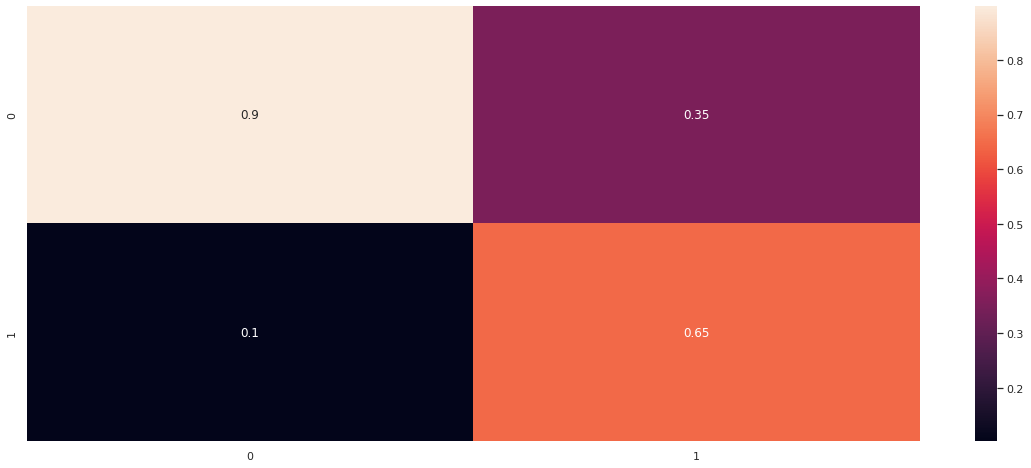

In [105]:
training_preds = predict_and_plot(x_train, train_target)

The accuracy score is 89.96 %


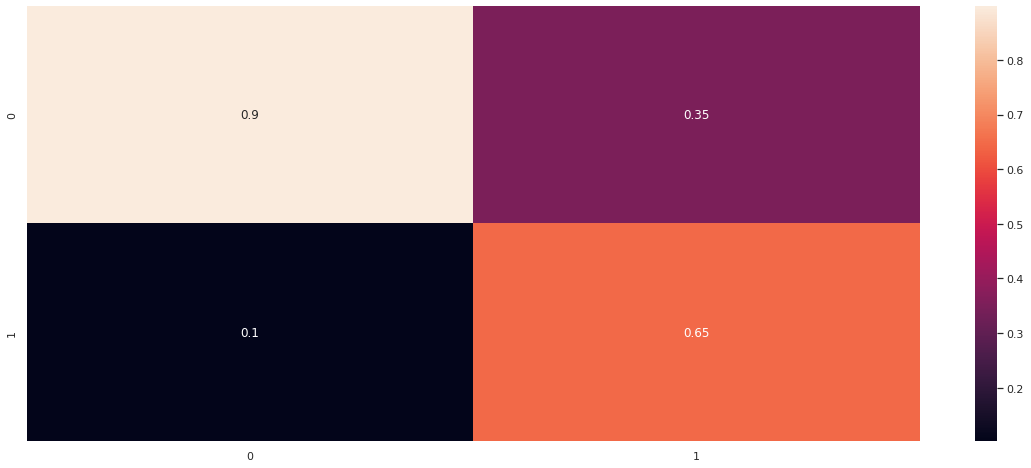

In [106]:
val_preds = predict_and_plot(x_val, val_target)

In [107]:
test_preds = model.predict(x_test)
test_preds

array([0, 0, 0, ..., 0, 0, 0])

Let's save this test predictions in the sample file provided in the dataset files that we have downloaded and submit it on the kaggle compition page.

In [108]:
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')
submission_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [109]:
submission_df['IsBadBuy'] = test_preds

In [110]:
submission_df.to_csv('logistic_submission.csv', index=None)

In [111]:
!head logistic_submission.csv

RefId,IsBadBuy
73015,0
73016,0
73017,0
73018,0
73019,1
73020,0
73021,0
73022,0
73023,0


# Traning XGBoost model

Next We will make XGBoost model and we will use `xgboost` from `XGBClassifier`.

In [112]:
from xgboost import XGBClassifier

In [113]:
xgbmodel = XGBClassifier()

In [114]:
xgbmodel.fit(x_train, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
preds = xgbmodel.predict(x_train)

In [116]:
acc_train_xgboost = round(xgbmodel.score(x_train, train_target) * 100, 2)
acc_val_xgboost = round(xgbmodel.score(x_val, val_target) * 100, 2)
print('XGBoost train accurary: ',acc_train_xgboost)
print('XGBoost val accurary: ',acc_val_xgboost)

XGBoost train accurary:  90.64
XGBoost val accurary:  89.27


Looks like xgboost gives us an accuracy of 79% for traning data and 77% accuracy for validation data, which is better than what logistic model gave us.

In [117]:
accuracy_score(preds, train_target)

0.9064181818181818

In [118]:
xgb_test_preds = xgbmodel.predict(x_test)
xgb_test_preds

array([0, 0, 0, ..., 0, 0, 0])

Let's save this test predictions also in the sample file and submit it on the kaggle compition page.

In [119]:
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')
submission_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [120]:
submission_df['IsBadBuy'] = xgb_test_preds

In [121]:
submission_df.to_csv('xgb_submission.csv', index = None)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf_model = RandomForestClassifier(n_estimators=100)

In [124]:
rf_model.fit(x_train, train_target)

RandomForestClassifier()

In [125]:
rf_preds = rf_model.predict(x_train)

In [ ]:
acc_train_random_forest = round(rf_model.score(x_train, train_target) * 100, 2)
acc_val_random_forest = round(rf_model.score(x_val, val_target) * 100, 2)
print('Random Forest train accurary: ',acc_train_random_forest)
print('Random Forest val accurary: ',acc_val_random_forest)

In [ ]:
accuracy_score(rf_preds, train_target)

In [ ]:
rf_val_preds = rf_model.predict(x_val)

In [ ]:
accuracy_score(rf_val_preds, val_target)

In [ ]:
rf_test_preds = rf_model.predict(x_test)

In [ ]:
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')
submission_df

In [ ]:
submission_df['IsBadBuy'] = rf_test_preds

In [ ]:
submission_df.to_csv('rf_submission.csv', index = None)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(x_train, train_target)

In [ ]:
dt_preds = dt_model.predict(x_train)

In [ ]:
acc_train_decision_tree = round(dt_model.score(x_train, train_target) * 100, 2)
acc_val_decision_tree = round(dt_model.score(x_val, val_target) * 100, 2)
print('Random Forest train accurary: ',acc_train_decision_tree)
print('Random Forest val accurary: ',acc_val_decision_tree)

In [ ]:
accuracy_score(train_target, dt_preds)

In [ ]:
dt_val_preds = dt_model.predict(x_val)

In [ ]:
accuracy_score(rf_val_preds, val_target)

In [ ]:
dt_test_preds = dt_model.predict(x_test)

In [ ]:
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')
submission_df

In [ ]:
submission_df['IsBadBuy'] = dt_test_preds

In [ ]:
submission_df.to_csv('dt_submission.csv', index = None)

# Traning a LGBMClassifier model

We will also train LGBMClassifier model and we will use `LBGMClassifier` from `lightgbm`.

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbmodel = LGBMClassifier()

In [ ]:
lgbmodel.fit(x_train, train_target)

In [ ]:
lgbm_preds = lgbmodel.predict(x_train)

In [ ]:
acc_train_lgbm = round(lgbmodel.score(x_train, train_target) * 100, 2)
acc_val_lgbm = round(lgbmodel.score(x_val, val_target) * 100, 2)
print('Random Forest train accurary: ',acc_train_lgbm)
print('Random Forest val accurary: ',acc_val_lgbm)

Looks like LGBM model gives an accuracy of 73% for training data and 72% accuracy for validation data.

In [ ]:
accuracy_score(lgbm_preds, train_target)

In [ ]:
lgbm_val_preds = lgbmodel.predict(x_val)

In [ ]:
accuracy_score(lgbm_val_preds, val_target)

In [ ]:
lgbm_test_preds = lgbmodel.predict(x_test)

Let's save the test predictions of this model also in the file submit it to the kagggle competition page.

In [ ]:
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')
submission_df

In [ ]:
submission_df['IsBadBuy'] = lgbm_test_preds

In [ ]:
submission_df.to_csv('lgbm_submission.csv', index = None)

In [ ]:
jovian.commit()

# Tuning HyperParameters

Let's tune hyperparameters for our model. We have trained Three model but we are going to tune the hyperparameters for **LGBM** and **XGBoost** only.

You can find the hyperparameters for `XGBoost` here : https://xgboost.readthedocs.io/en/stable/parameter.html and `LGBMClassier` here : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are used to improve the learning of the model.

## xgboost

Let's frist create a helper function which takes model name and a set of parameters and then gives us the training and validation accuracy and an another function takes the model name and a hyperparameter name and a set of values, calculates the traning and validation accuracy for all the set of values provided and plots it on a graph.

In [ ]:
def test_params(ModelName, **params):
  model = ModelName(**params).fit(x_train, train_target)
  train_accuracy = accuracy_score(model.predict(x_train), train_target)
  val_accuracy = accuracy_score(model.predict(x_val), val_target)
  return train_accuracy, val_accuracy

def test_params_and_plot(ModelName, param_name, param_values, **other_params):
  train_accL = []
  val_accL =[]
  for value in param_values:
    params = dict(other_params)
    params[param_name] = value
    train_acc, val_acc = test_params(ModelName, **params)
    train_accL.append(train_acc)
    val_accL.append(val_acc)
  
  plt.figure(figsize = (10, 5))
  plt.plot(param_values, train_accL, 'b-o')
  plt.plot(param_values, val_accL, 'r-o')
  plt.title('Overfitting Curve ' + param_name)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])



best_params = {
    'random_state': 42,
    'n_jobs': -1,
}

Let's start by **n_estimators** which bassically states the number of trees to create and provide it a set of values

CPU times: user 20min 41s, sys: 3.01 s, total: 20min 44s
Wall time: 10min 35s


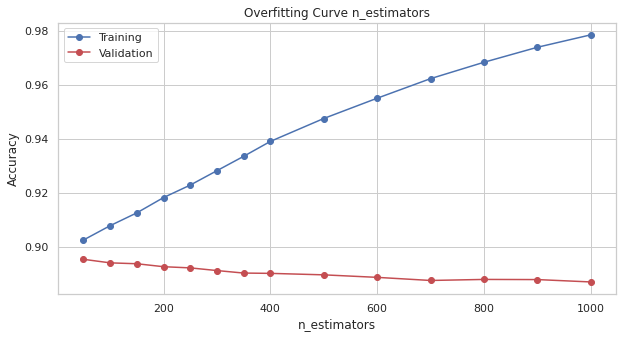

In [ ]:
%%time
test_params_and_plot(XGBClassifier, 'n_estimators', [50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000], **best_params)

As wee can see in the graph that as we increase the number of estimators the accuracy for both traning and validation are increasing as well so, so we can take the value of **n_estimaors** as 1000.

Let's do this foro all other hyperparametrs to get the best possible value them like **max_depth, eta, max_delta_step, subsmaple, max_leaves**

CPU times: user 2min 57s, sys: 473 ms, total: 2min 57s
Wall time: 1min 30s


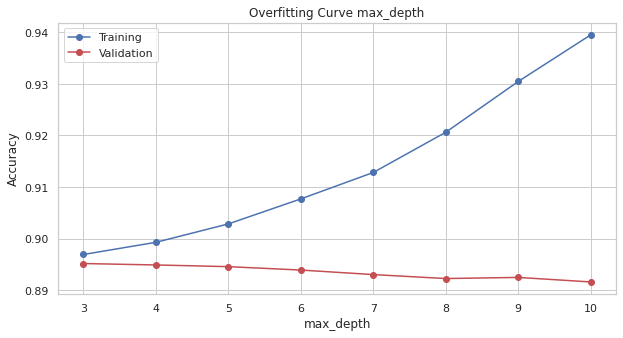

In [ ]:
%%time
test_params_and_plot(XGBClassifier, 'max_depth', [3, 4, 5, 6, 7, 8, 9, 10], **best_params)

CPU times: user 3min 3s, sys: 456 ms, total: 3min 3s
Wall time: 1min 33s


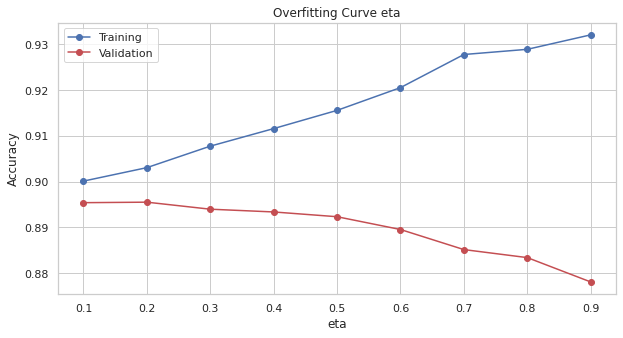

In [ ]:
%%time
test_params_and_plot(XGBClassifier, 'eta', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], **best_params)

CPU times: user 3min 23s, sys: 540 ms, total: 3min 24s
Wall time: 1min 44s


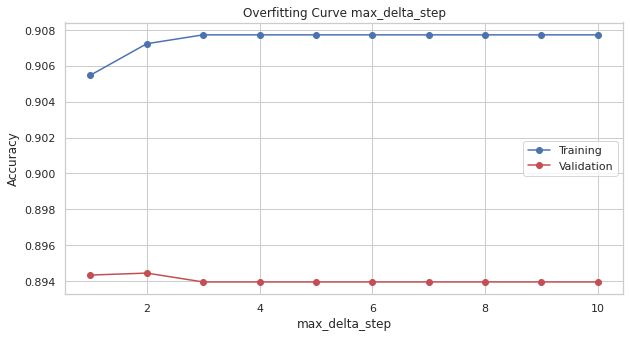

In [ ]:
%%time
test_params_and_plot(XGBClassifier, 'max_delta_step', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], **best_params)

CPU times: user 2min 15s, sys: 341 ms, total: 2min 16s
Wall time: 1min 9s


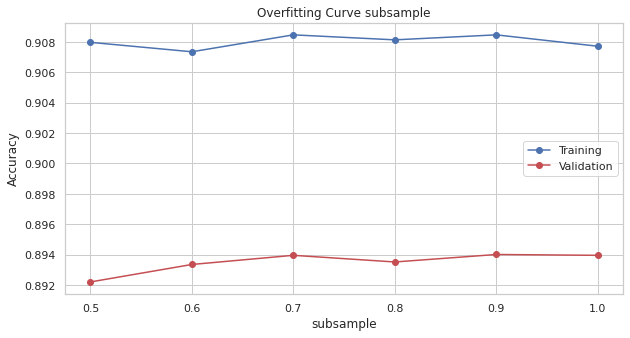

In [ ]:
%%time
test_params_and_plot(XGBClassifier, 'subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1], **best_params)

CPU times: user 3min 23s, sys: 510 ms, total: 3min 24s
Wall time: 1min 44s


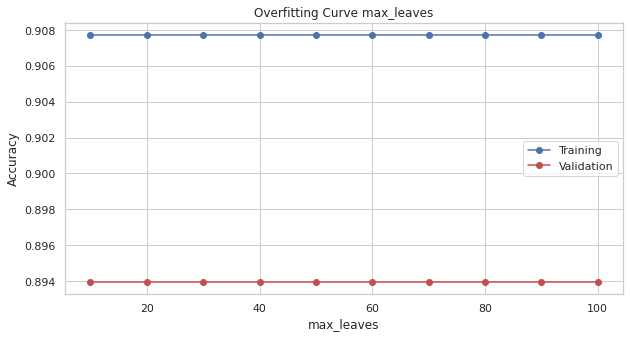

In [ ]:
%%time
test_params_and_plot(XGBClassifier, 'max_leaves', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], **best_params)

Looks like the best possible values the hyperparameter:

- max_depth : 10
- eta : 0.8
- max_delta_step : 3
- subsample : 0.8
- max_leaves : It's just a straight line

## lgbm

For LGBm, we will also start with **n_estimators**

CPU times: user 1min 43s, sys: 862 ms, total: 1min 44s
Wall time: 1min 1s


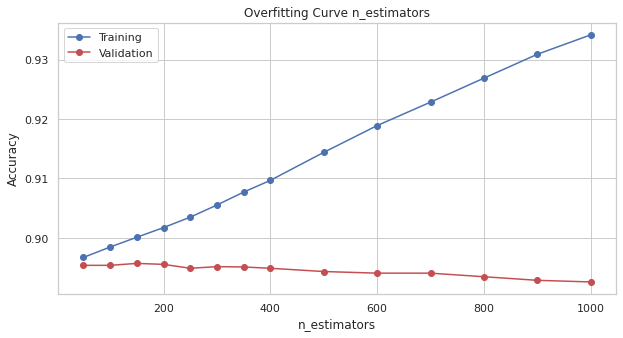

In [ ]:
%%time
test_params_and_plot(LGBMClassifier, 'n_estimators', [50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000], **best_params)

CPU times: user 18.1 s, sys: 127 ms, total: 18.3 s
Wall time: 9.53 s


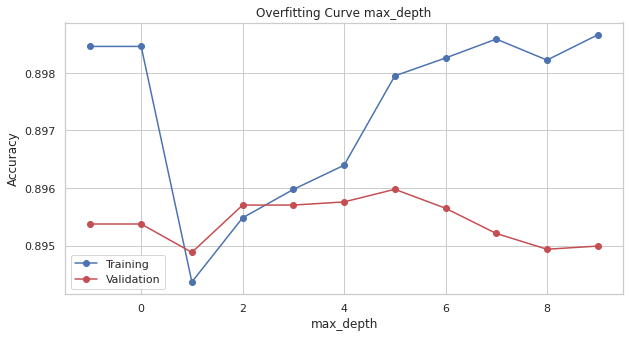

In [ ]:
%%time
test_params_and_plot(LGBMClassifier, 'max_depth', [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8 ,9], **best_params)

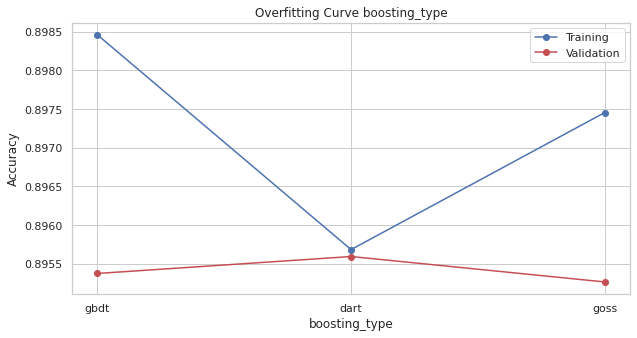

In [ ]:
test_params_and_plot(LGBMClassifier, 'boosting_type', ['gbdt', 'dart', 'goss'], **best_params)

CPU times: user 15.6 s, sys: 166 ms, total: 15.8 s
Wall time: 8.29 s


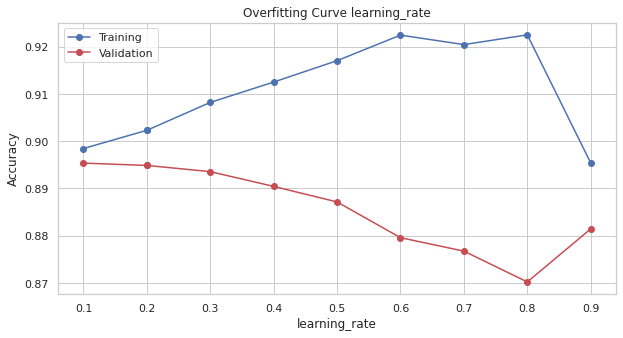

In [ ]:
%%time
test_params_and_plot(LGBMClassifier, 'learning_rate', [0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], **best_params)

CPU times: user 18.2 s, sys: 171 ms, total: 18.3 s
Wall time: 9.54 s


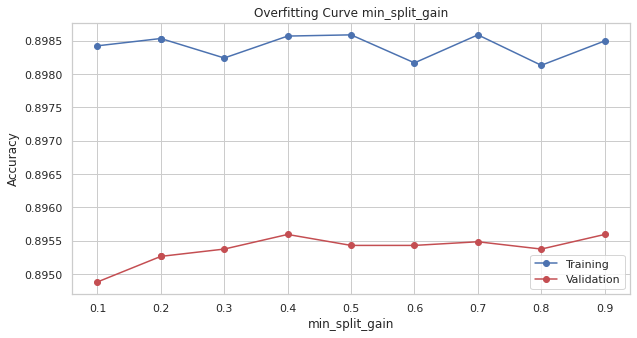

In [ ]:
%%time
test_params_and_plot(LGBMClassifier, 'min_split_gain', [0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], **best_params)

CPU times: user 24.7 s, sys: 227 ms, total: 24.9 s
Wall time: 13 s


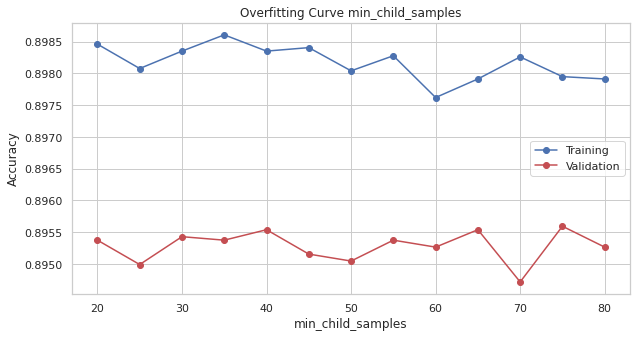

In [ ]:
%%time
test_params_and_plot(LGBMClassifier, 'min_child_samples', [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], **best_params)

Looks like the best possible values the hyperparameter:

- n_estimators : 1000
- max_depth : 10
- boosting_type : 0.8
- learning_rate : 3
- min_split_gain : 0.8
- min_child_samples : It's just a straight line

Let's now use these hyperparameters to train the model and see if it has any impact on the accuracy.

In [ ]:
lgbm_train_acc, lgbm_val_acc = test_params(LGBMClassifier, random_state = 42, n_jobs =-1, n_estimators= 1000, max_depth = 7, learning_rate = 0.7, min_split_gain = 0.3, min_child_samples = 45)

In [ ]:
lgbm_train_acc

0.9148108226610885

In [ ]:
lgbm_val_acc

0.8863312506850817

As we can see from the above score that the tuning had a significant impact on the accuracy score as the score had jumped to 93% for training data and 87% fro the validation data.

# Training the best model and making predictions.

Let's train the best model with the best set of hyperparameters that we found so as to minimize the validation loss.

We won't use subsample and max_leaves cause they contribute much to minimize the validation loss.

In [ ]:
n_xgb_model = XGBClassifier(n_estimators = 1000, max_depth = 10, eta = 0.8, max_delta_step = 3, random_state = 42, n_jobs = -1)

In [ ]:
n_xgb_model.fit(x_train, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.800000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=3, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

In [ ]:
n_train_preds = n_xgb_model.predict(x_train)

In [ ]:
accuracy_score(n_train_preds, train_target)

1.0

In [ ]:
n_val_preds = n_xgb_model.predict(x_val)

In [ ]:
accuracy_score(n_val_preds, val_target)

0.8750959114326428

Look's like we achieved 100% accuracy for training data 96 % accuracy for the validation data.

In [ ]:
n_xgb_test_preds = n_xgb_model.predict(x_test)

In [ ]:
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')
submission_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [ ]:
submission_df['IsBadBuy'] = n_xgb_test_preds

In [ ]:
submission_df.to_csv('n_xgb_submission.csv', index = None)

In [ ]:
n_xgb_model.classes_

array([0, 1])

In [ ]:
n2_xgb_model = XGBClassifier(n_estimators = 1000, max_depth = 10, eta = 0.8, max_delta_step = 3, random_state = 42, n_jobs = -1, class_weight='balanced')

In [ ]:
n2_xgb_model.fit(x_train, train_target)

[15:59:19] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8, eval_metric=None, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.800000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=3, max_depth=10,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [ ]:
n2_train_preds = n2_xgb_model.predict(x_train)

In [ ]:
accuracy_score(n2_train_preds, train_target)

1.0

In [ ]:
n2_val_preds = n2_xgb_model.predict(x_val)

In [ ]:
accuracy_score(n2_val_preds, val_target)

0.8750959114326428

In [ ]:
n2_xgb_test_preds = n2_xgb_model.predict(x_test)

In [ ]:
submission_df['IsBadBuy'] = n2_xgb_test_preds

In [ ]:
submission_df.to_csv('n2_xgb_submission.csv', index = None)

Let's create a dataframe of features that our model finds more important than other feature.

In [ ]:
xgb_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': n_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)
xgb_importance_df.head(10)

,feature,importance
11,WheelType_Unkown,0.379960
32,PRIMEUNIT_Unkown,0.092039
31,PRIMEUNIT_NO,0.068616
34,AUCGUART_GREEN,0.057292
14,Nationality_OTHER,0.033342
0,VehicleAge,0.022175
10,WheelType_Special,0.019865
37,IsOnlineSale_0,0.018411
25,Size_SPORTS,0.017064
22,Size_SMALL SUV,0.016121


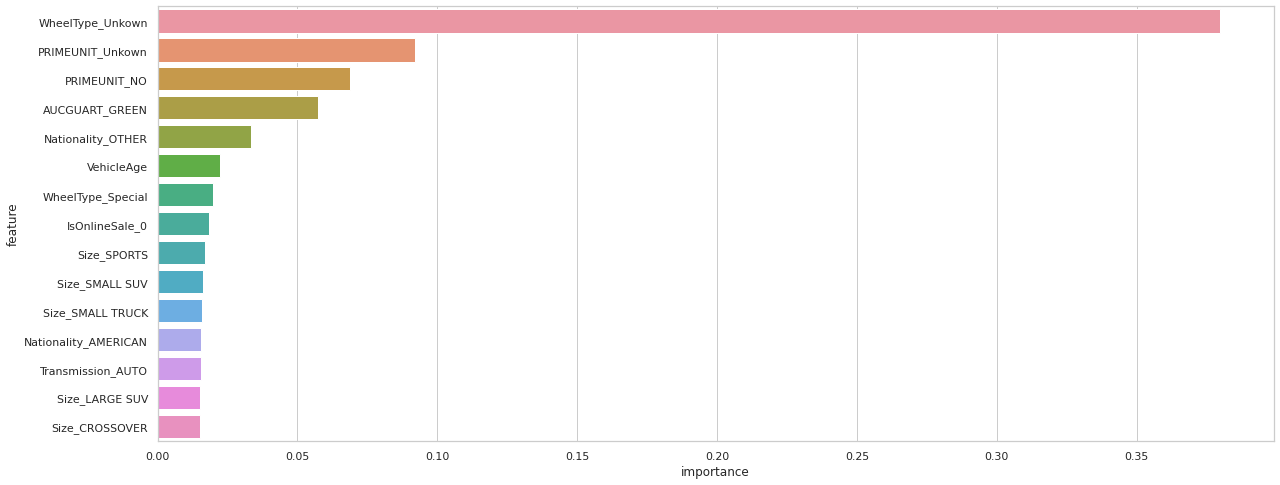

In [ ]:
sns.barplot(data=xgb_importance_df.head(15), x='importance', y='feature')

# Summary

We downloaded, explored, performed EDA(Exploratory Data Analysis), cleaned and trained a few models to automate the process of identifying if a car bought at ann auction is a good buy or a bad buy.

- Our training data had approx 73k rows and test data had with 34 columns.
- We prepared the dataset first by remove the columns which had too msny catagories or were too closely correlated and then imputed the missing values in both catagorical columns and numerical columns.
- We also encoded the catagorical columns with One hot encoding and scaled the numerical values using MinMaxScaler.
- As we already has test dataset therefore we split the trainig data into train data and validation data and tarined some dumb models to get a baseline for our models.
- The dataset was also unbalanced and one of the rules in machine learning is, its important to balance out the data set or at least get it close to balance it. The main reason for this is to give equal priority to each class in laymen terms so we balanced the dataset before we trained our model on it.
- We've trained three models mainly: `LogisticRegression`, `XGBoost` and `LGBMClasiifier`.
- `XGBoost` performed better that the rest so performed hyperparameter tuning on it and achieved an accuracy of 96% on the validation dataset.


**Possible Future Work:**

- Performing better feature engineering.
- Optimal Hyperparameter tuning.
- Training more different models and trying ensemble techniques(using the outputs of one model as the inputs of the next).
- performing cross-validation like k_fold.

**References** 

Linear Regression with Scikit-Learn [Jovian Aakash N S ](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/linear-regression-with-scikit-learn)  
How to approach Machine Learning Problems [Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems)  
Gradient Boosting Machines with XGBoost [Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost)  

**Documentation**  
Scikit Learn Supervised Learning [documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)  
Light GBM [documentation](https://lightgbm.readthedocs.io/en/latest/)  
XGBoost [documentation](https://xgboost.readthedocs.io/en/latest/)

****    
Tune Learning Rate for Gradient Boosting with XGBoost in Python [Machine Learning Mastery](https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/)   
Fine-tuning XGBoost in Python like a boss  [Félix Revert](https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e)    
Understanding LightGBM Parameters (and How to Tune Them) [MJ Bahmani](https://neptune.ai/blog/lightgbm-parameters-guide)  


In [ ]:
jovian.commit()